In [1]:
import pickle
import numpy as np
prtest = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb'))
ftest = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb'))
ft = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb'))
prt = pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb'))
nt, yt, xt = prtest.shape
n, y, x = prt.shape


In [2]:
# normalised mean square error - normalise, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot




In [3]:
# creating a lower resolution image to allow for greater no. of tests
prtqtr = list()
Y = int(y/2)
X = int(x/2)
f=0
g=0
for m in range(n):
    prtqtrdummy = np.array(np.zeros([Y,X]))
    for f in range(Y):
        for g in range(X):
            prtqtrdummy[f,g] = (1/4)*(prt[m,2*f,2*g]+prt[m,2*f+1,2*g]+prt[m,2*f,2*g+1]+prt[m,2*f+1,2*g+1])
    prtqtr.append(prtqtrdummy)
prt = np.array(prtqtr)
n, y, x = prt.shape




In [5]:
prtest = np.array(prtest)

In [6]:
prtest.shape

(200, 50, 50)

In [4]:
prtqtrtest = list()
Y = int(yt/2)
X = int(xt/2)
f=0
g=0
for m in range(nt):
    prtqtrdummytest = np.array(np.zeros([Y,X]))
    for f in range(Y):
        for g in range(X):
            prtqtrdummytest[f,g] = (1/4)*(prtest[m,2*f,2*g]+prtest[m,2*f+1,2*g]+prtest[m,2*f,2*g+1]+prtest[m,2*f+1,2*g+1])
    prtqtrtest.append(prtqtrdummytest)
prtest = np.array(prtqtrtest)
nt, yt, xt = prtest.shape

In [5]:
#point cloud generation - coin flip method
ran = np.random.default_rng().uniform(size = (n,y,x))
flips = prt < ran
xpts1 = list()
ypts1 = list()
xypts1 = list()
for m in range(n):
    pts = np.argwhere(flips[m] == False)
    xypts1.append(pts)
    pts_y = pts[:,0]
    pts_x = pts[:,1]
    ypts1.append(pts_y)
    xpts1.append(pts_x) 

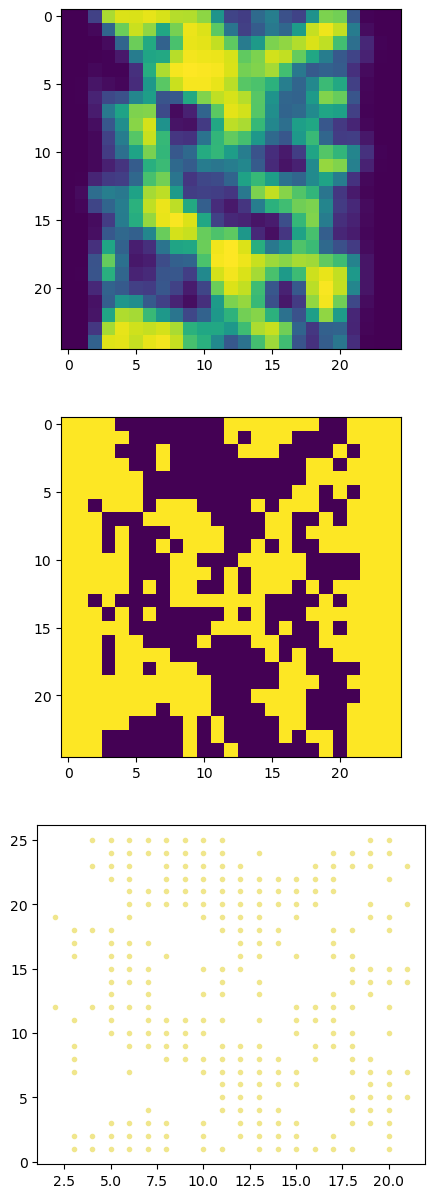

In [6]:
import matplotlib.pyplot as plt
inum = 19
train = prt[inum]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), gridspec_kw={'height_ratios': [1,1,1]})
ax1.imshow(train)
train = flips[inum]
ax2.imshow(train)
ax3.scatter(xpts1[inum],25-ypts1[inum],marker = '.', color = 'khaki')

In [173]:
ytest=25
xtest = 25
ntest = 200

In [7]:
#point cloud generation - coin flip method -- test
rantest = np.random.default_rng().uniform(size = (nt,yt,xt))
flipstest = prtest < rantest
xpts1test = list()
ypts1test = list()
xypts1test = list()
for m in range(nt):
    pts = np.argwhere(flipstest[m] == False)
    xypts1test.append(pts)
    pts_y = pts[:,0]
    pts_x = pts[:,1]
    ypts1test.append(pts_y)
    xpts1test.append(pts_x)  



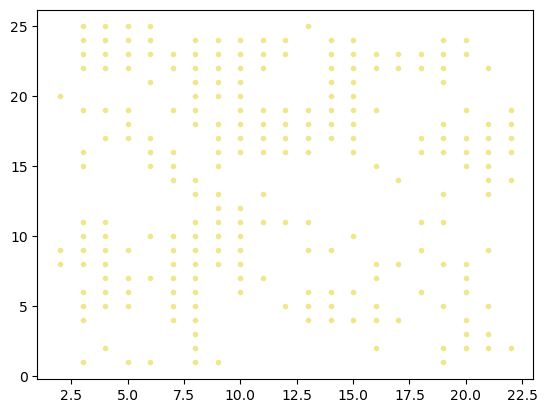

In [8]:
i = 0
plt.scatter(xpts1[i],25-ypts1[i],marker = '.', color = 'khaki')
plt.show()

In [9]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence(n_jobs=-1)
PtCloudPers1 = VR.fit_transform(xypts1)
VR.plot(PtCloudPers1,0)


(240, 2) (213, 2)


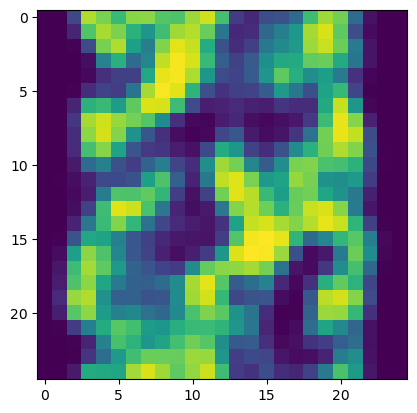

In [10]:
print(xypts1[1].shape, xypts1test[1].shape)
fig, ax = plt.subplots()
im = ax.imshow(prt[79])

In [11]:
PtCloudPers1test = VR.fit_transform(xypts1test)
VR.plot(PtCloudPers1test,0)

In [12]:
#point cloud generation - a measure on a square

msr = np.sum(np.sum(prt, axis=-1), axis=-1)
k = np.round(msr)

ypts2 = list()
xpts2 = list()
xypts2 = list()

for m in range(n):
    p0 = prt[m]/msr[m]     #probability matrix
    p_flat = p0.flatten()
    pts = np.random.default_rng().choice(x*y,int(k[m]),p=p_flat)
    pts_y = pts//y
    pts_x = pts%x
    pts_xy = np.transpose([pts_x,pts_y])
    ypts2.append(pts_y)
    xpts2.append(pts_x)
    xypts2.append(pts_xy)


In [17]:
ft[0]

0.4554189049891245

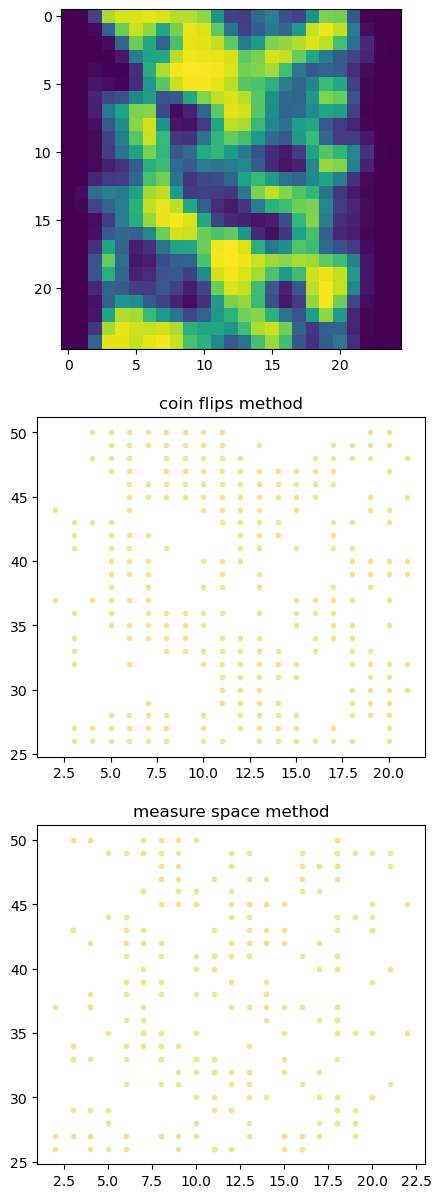

In [13]:
#comparing coin flips and msr space
i = 19
train = prt[i]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), gridspec_kw={'height_ratios': [1,1,1]})
ax1.imshow(train)
ax2.scatter(xpts1[i],50-ypts1[i],marker = '.', color = 'khaki')
ax2.set_title('coin flips method')
ax3.scatter(xpts2[i],50-ypts2[i],marker = '.', color = 'khaki')
ax3.set_title('measure space method')
plt.show()

In [14]:
#comparing coin flips and msr space - no. of points
flipsptscount = list()
for m in range(n):
    flipsptscount.append(xypts1[m].shape)
msrptscount = list()
for m in range(n):
    msrptscount.append(xypts2[m].shape)

flipsptscount = np.array(flipsptscount)
msrptscount = np.array(msrptscount)
ptsratio = flipsptscount / msrptscount
print(ptsratio.mean())

# note this is the comparison of no. of points counting multiplicities - and is, as expected, equal.

xypts2uniq = list()
msrptscountuniq = list()
for m in range(n):
    d = np.unique(xypts2[m])
    xypts2uniq.append(d)
    msrptscountuniq.append(d.shape)

msrptscountuniq = np.array(msrptscountuniq)
ptsratiouniq = flipsptscount / msrptscountuniq
print(ptsratiouniq.mean())
    


1.0007776688918855
4.745519710144928


In [15]:
# sum(p-q) vs flux flip
import numpy.polynomial.polynomial as npl
i = PtCloudPers1.shape[0]
pers1diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers1[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0[j] = diff_sumC

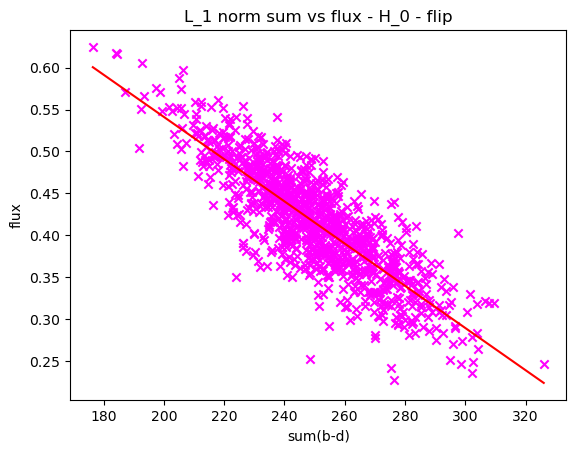

In [16]:
_ = plt.scatter(pers1diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0, ft, 1)
r = [min(pers1diff_sum_0),max(pers1diff_sum_0)]
_ = plt.plot([min(pers1diff_sum_0),max(pers1diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

In [17]:
# sum(p-q) vs flux flip -- test
itest = PtCloudPers1test.shape[0]
pers1diff_sum_0test = np.zeros(itest)
for j in range(itest): 
    C = PtCloudPers1test[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_0test[j] = diff_sumC

In [18]:
import numpy as np
from sklearn.linear_model import RidgeCV as LR
ytest = LR().fit(pers1diff_sum_0.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


nmse =  50.06122275244533
rsq =  0.7496938862377733


In [19]:
# OLS flip space L1 sum H0
import statsmodels.api as sm
pers1diff_sum_0plusc = sm.add_constant(pers1diff_sum_0)
mod = sm.OLS(ft, pers1diff_sum_0plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2330.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.86e-263
Time:                        17:39:33   Log-Likelihood:                 1916.0
No. Observations:                1000   AIC:                            -3828.
Df Residuals:                     998   BIC:                            -3818.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0445      0.013     79.887      0.0

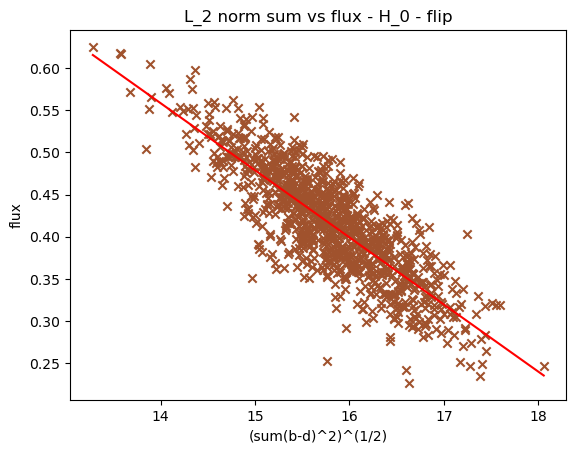

In [20]:
# L2 norm flip H0
pers1diff_sum_0_L2 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_0_L2[x] = diff_sumCL2
_ = plt.scatter(pers1diff_sum_0_L2,ft, marker='x',color='sienna')
_ = plt.title('L_2 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0_L2, ft, 1)
a = min(pers1diff_sum_0_L2)
b = max(pers1diff_sum_0_L2)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [21]:
# L2 norm flip H0 -- test
pers1diff_sum_0_L2test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_0_L2test[x] = diff_sumCL2

In [22]:
ytest = LR().fit(pers1diff_sum_0_L2.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0_L2test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  49.35837939085881
rsq =  0.753208103045706


In [23]:
# OLS flip space L2 sum H0
import statsmodels.api as sm
pers1diff_sum_0_L2plusc = sm.add_constant(pers1diff_sum_0_L2)
mod = sm.OLS(ft, pers1diff_sum_0_L2plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2350.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.46e-264
Time:                        17:39:34   Log-Likelihood:                 1919.0
No. Observations:                1000   AIC:                            -3834.
Df Residuals:                     998   BIC:                            -3824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6706      0.026     64.477      0.0

1000


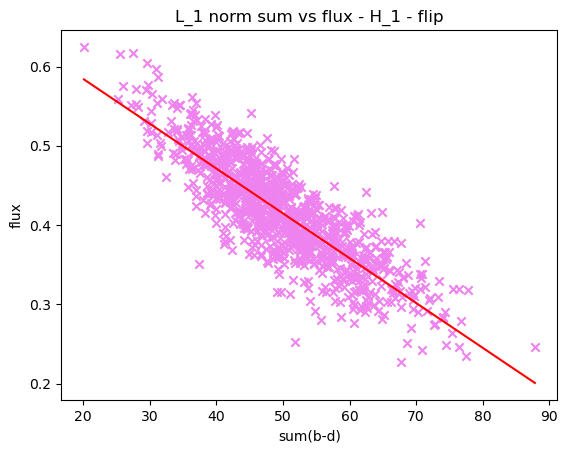

In [24]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers1.shape[0]
print(i)
pers1diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers1[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_1[j] = diff_sumC
_ = plt.scatter(pers1diff_sum_1,ft, marker='x',color='violet')
_ = plt.title('L_1 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1, ft, 1)
r = [min(pers1diff_sum_1),max(pers1diff_sum_1)]
_ = plt.plot([min(pers1diff_sum_1),max(pers1diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

In [25]:
# sum(p-q) vs flux  --test
pers1diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = PtCloudPers1test[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    pers1diff_sum_1test[j] = diff_sumC

In [26]:
# test nmse and rsq flip L1 H1
ytest = LR().fit(pers1diff_sum_1.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  49.37777712023387
rsq =  0.7531111143988306


In [27]:
# OLS flip space L1 sum H1
import statsmodels.api as sm
pers1diff_sum_1plusc = sm.add_constant(pers1diff_sum_1)
mod = sm.OLS(ft, pers1diff_sum_1plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2501.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.35e-274
Time:                        17:39:36   Log-Likelihood:                 1941.0
No. Observations:                1000   AIC:                            -3878.
Df Residuals:                     998   BIC:                            -3868.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.006    121.486      0.0

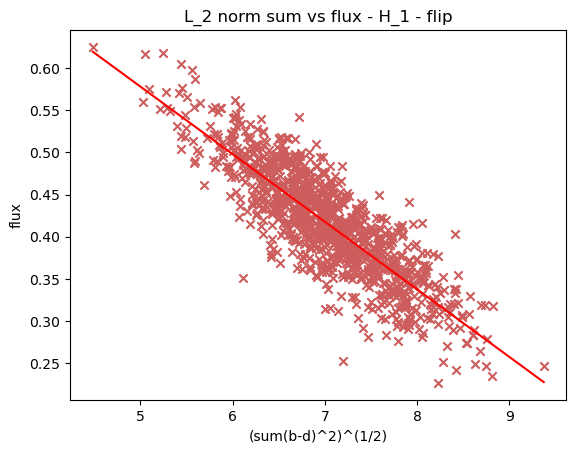

In [28]:
# L2 norm flip H1
pers1diff_sum_1_L2 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_1_L2[x] = diff_sumCL2
_ = plt.scatter(pers1diff_sum_1_L2,ft, marker='x',color='indianred')
_ = plt.title('L_2 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('(sum(b-d)^2)^(1/2)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1_L2, ft, 1)
a = min(pers1diff_sum_1_L2)
b = max(pers1diff_sum_1_L2)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [29]:
# L2 norm flip H1 -- test
pers1diff_sum_1_L2test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCL2 = np.square(diff_vectC)
    diff_sumCL2squared = np.sum(diff_vectC)
    diff_sumCL2 = np.sqrt(diff_sumCL2squared)
    pers1diff_sum_1_L2test[x] = diff_sumCL2

In [30]:
# test nmse and rsq flip L2 H1
ytest = LR().fit(pers1diff_sum_1_L2.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1_L2test.reshape(-1,1))
print('results on the training set linear regression, L2 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum, H1, flip method
nmse =  47.49532109425335
rsq =  0.7625233945287333


In [31]:
# OLS flip space L2 sum H1
import statsmodels.api as sm
pers1diff_sum_1_L2plusc = sm.add_constant(pers1diff_sum_1_L2)
mod = sm.OLS(ft, pers1diff_sum_1_L2plusc)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2585.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          3.10e-279
Time:                        17:39:44   Log-Likelihood:                 1952.8
No. Observations:                1000   AIC:                            -3902.
Df Residuals:                     998   BIC:                            -3892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9779      0.011     88.007      0.0

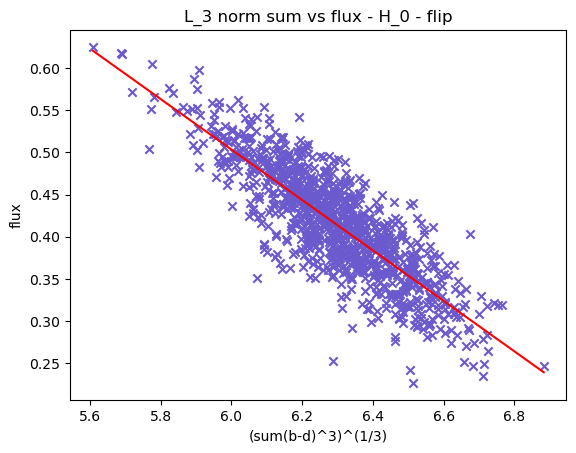

In [32]:
# L3 norm flip H0
pers1diff_sum_0_L3 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_0_L3[x] = diff_sumCroot

# test set
pers1diff_sum_0_L3test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_0_L3test[x] = diff_sumCroot

_ = plt.scatter(pers1diff_sum_0_L3,ft, marker='x',color='slateblue')
_ = plt.title('L_3 norm sum vs flux - H_0 - flip')
_ = plt.xlabel('(sum(b-d)^3)^(1/3)')
_ = plt.ylabel('flux')
#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_0_L3, ft, 1)
a = min(pers1diff_sum_0_L3)
b = max(pers1diff_sum_0_L3)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [33]:
# test nmse and rsq flip L3 H0
ytest = LR().fit(pers1diff_sum_0_L3.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_0_L3test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  49.195589176334366
rsq =  0.7540220541183281


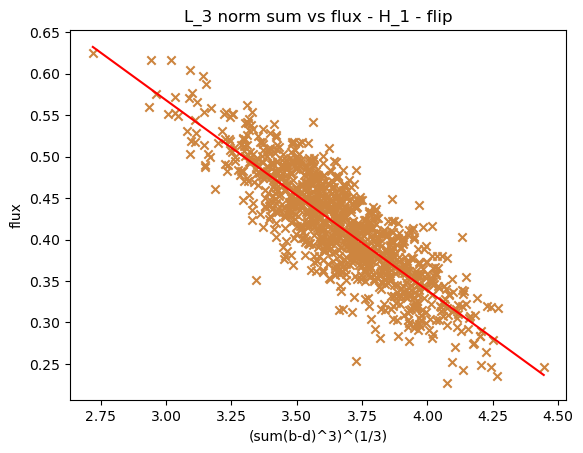

In [34]:
# L3 norm flip H1
pers1diff_sum_1_L3 = np.zeros(i)
for x in range(i): 
    C = PtCloudPers1[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_1_L3[x] = diff_sumCroot

# test set
pers1diff_sum_1_L3test = np.zeros(itest)
for x in range(itest): 
    C = PtCloudPers1test[x,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_vectCpower = np.power(diff_vectC,3)
    diff_sumCpower = np.sum(diff_vectC)
    diff_sumCroot = np.power(diff_sumCpower,1/3)
    pers1diff_sum_1_L3test[x] = diff_sumCroot

_ = plt.scatter(pers1diff_sum_1_L3,ft, marker='x',color='peru')
_ = plt.title('L_3 norm sum vs flux - H_1 - flip')
_ = plt.xlabel('(sum(b-d)^3)^(1/3)')
_ = plt.ylabel('flux')
#linear regression using polynomial fit
c, m  = npl.polyfit(pers1diff_sum_1_L3, ft, 1)
a = min(pers1diff_sum_1_L3)
b = max(pers1diff_sum_1_L3)
r = [a,b]
_ = plt.plot([a,b], np.array(m) * r + c, 'r')
plt.show()

In [35]:
# test nmse and rsq flip L3 H1
ytest = LR().fit(pers1diff_sum_1_L3.reshape(-1,1),np.array(ft)).predict(pers1diff_sum_1_L3test.reshape(-1,1))
print('results on the training set linear regression, L1 sum, H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H1, flip method
nmse =  47.29072848354342
rsq =  0.7635463575822828


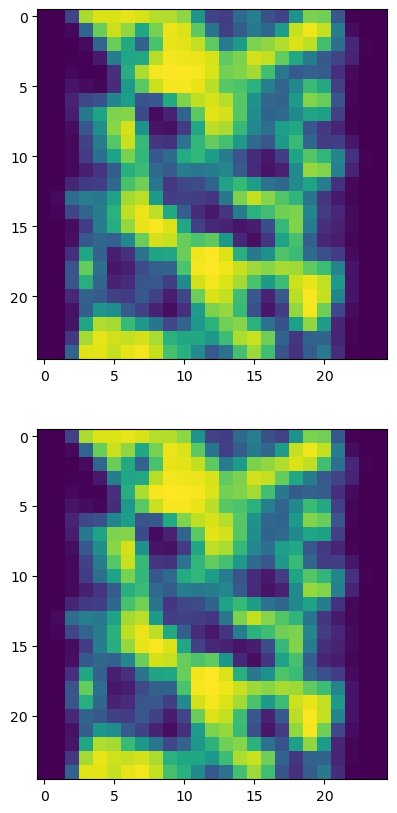

In [36]:
# comparison smaller array to bigger array
inum = 19
train = prt[inum]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,10), gridspec_kw={'height_ratios': [1,1]})
ax1.imshow(train)
train = prtqtr[inum]
ax2.imshow(train)

In [37]:
# test nmse and rsq flip L1 H0 and H1
pers1diff_sum_01 = np.array([pers1diff_sum_0,pers1diff_sum_1]).T
pers1diff_sum_01test = np.array([pers1diff_sum_0test,pers1diff_sum_1test]).T
ytest = LR().fit(pers1diff_sum_01,np.array(ft)).predict(pers1diff_sum_01test)
print('results on the training set linear regression, L1 sum, H0 and H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L1 sum, H0 and H1, flip method
nmse =  45.9662396356795
rsq =  0.7701688018216025


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning:

invalid value encountered in reciprocal



In [38]:
#statsmodel flip space OLS L1 H0 and H1
import statsmodels.api as sm
pers1diff_sum_01 = np.array([pers1diff_sum_0,pers1diff_sum_1]).T
pers1diff_sum_01plusc = sm.add_constant(pers1diff_sum_01)
mod01 = sm.OLS(ft, pers1diff_sum_01plusc)
res01 = mod01.fit()
print(res01.summary())
print(res01.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1330.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.13e-282
Time:                        17:40:07   Log-Likelihood:                 1963.7
No. Observations:                1000   AIC:                            -3921.
Df Residuals:                     997   BIC:                            -3907.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8501      0.023     36.754      0.0

In [39]:
# test nmse and rsq flip L2 H0 and H1
pers1diff_sum_01_L2 = np.array([pers1diff_sum_0_L2,pers1diff_sum_1_L2]).T
pers1diff_sum_01_L2test = np.array([pers1diff_sum_0_L2test,pers1diff_sum_1_L2test]).T
ytest = LR().fit(pers1diff_sum_01_L2,np.array(ft)).predict(pers1diff_sum_01_L2test)
print('results on the training set linear regression, L2 sum, H0 and H1, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum, H0 and H1, flip method
nmse =  44.68820568568271
rsq =  0.7765589715715865


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning:

invalid value encountered in reciprocal



In [40]:
#statsmodel flip space OLS L2 H0 and H1
import statsmodels.api as sm
pers1diff_sum_01_L2 = np.array([pers1diff_sum_0_L2,pers1diff_sum_1_L2]).T
pers1diff_sum_01_L2plusc = sm.add_constant(pers1diff_sum_01_L2)
mod01 = sm.OLS(ft, pers1diff_sum_01_L2plusc)
res01 = mod01.fit()
print(res01.summary())
print(res01.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1362.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          6.63e-286
Time:                        17:40:16   Log-Likelihood:                 1972.4
No. Observations:                1000   AIC:                            -3939.
Df Residuals:                     997   BIC:                            -3924.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2593      0.046     27.423      0.0

In [41]:
# try adding measure -- flip L2 norm and msr
msrtest = np.sum(np.sum(prtest, axis=-1), axis=-1)
msr.shape
pers1diff_sum_0.shape

(1000,)

In [42]:

pers1diff_sum_1_L2_addmsr = np.array([pers1diff_sum_1_L2,msr]).T
pers1diff_sum_1_L2_addmsrtest = np.array([pers1diff_sum_1_L2test,msrtest]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, L2 sum H1 and msr, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, L2 sum H1 and msr, flip method
nmse =  25.768039534069114
rsq =  0.8711598023296544


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning:

invalid value encountered in reciprocal



In [47]:
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence()
PtCloudPers2 = VR.fit_transform(xypts2)
VR.plot(PtCloudPers2,0)

1000


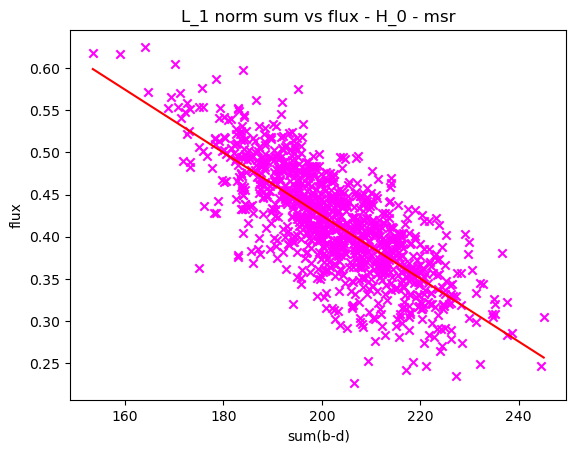

In [48]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers2.shape[0]
print(i)
Pers2_diff_sum_0 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers2[j,:,:]
    CH = C[np.where( C[:,2]== 0,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_0[j] = diff_sumC
_ = plt.scatter(Pers2_diff_sum_0,ft, marker='x',color='magenta')
_ = plt.title('L_1 norm sum vs flux - H_0 - msr')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_0, ft, 1)
r = [min(Pers2_diff_sum_0),max(Pers2_diff_sum_0)]
_ = plt.plot([min(Pers2_diff_sum_0),max(Pers2_diff_sum_0)], np.array(m) * r + c, 'r')
plt.show()

1000


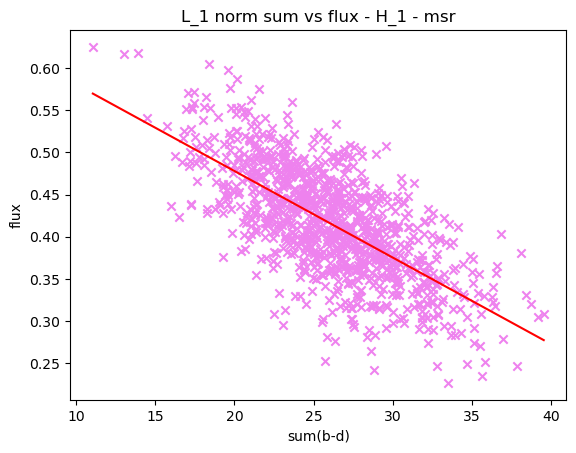

In [49]:
# sum(p-q) vs flux
import numpy.polynomial.polynomial as npl
i = PtCloudPers2.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = PtCloudPers2[j,:,:]
    CH = C[np.where( C[:,2]== 1,)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC
_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='violet')
_ = plt.title('L_1 norm sum vs flux - H_1 - msr')
_ = plt.xlabel('sum(b-d)')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

In [50]:
#Persistence diagrams flips
from gtda.diagrams import PersistenceLandscape
PLless = PersistenceLandscape(n_layers=10,n_bins=10)
xflip= PLless.fit_transform(PtCloudPers1)

In [51]:
PLless.plot(xflip,340)

In [52]:
#linear regression of all layers flip
a,b,c = xflip.shape
print(a,b,c)
xflipall = np.reshape(xflip,[a,b*c,-1])[:,:,0]
xflipallc = sm.add_constant(xflipall)
flippersmodelall = sm.OLS(ft,xflipallc)
flippersresultsall = flippersmodelall.fit()
print(flippersresultsall.summary())

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     9.678
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.43e-80
Time:                        17:36:05   Log-Likelihood:                 1631.7
No. Observations:                1000   AIC:                            -3093.
Df Residuals:                     915   BIC:                            -2676.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.24e-14   2.35e-14     -0.9

In [53]:
#linear regression first layer flip
PL = PersistenceLandscape(n_layers=2,n_bins=100)
xflipbins = PL.fit_transform(PtCloudPers1)
PL.plot(xflipbins,340)

In [54]:
#linear regression of first layer of H0 and H1 flip

xflipbins01  = np.concatenate((xflipbins[:,0,:],xflipbins[:,2,:]), axis=1)
flippersmodel01 = sm.OLS(ft,xflipbins01)
flippersresults01 = flippersmodel01.fit()
print(flippersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     4.590
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.77e-34
Time:                        17:36:13   Log-Likelihood:                 1506.8
No. Observations:                1000   AIC:                            -2826.
Df Residuals:                     906   BIC:                            -2364.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.262e+07   8.34e+07      0.990      0.3

In [154]:
#Persistence diagrams from our measure space method
from gtda.diagrams import PersistenceLandscape
xmsr= PLless.fit_transform(PtCloudPers2)

In [55]:
PLless.plot(xmsr,340)

NameError: name 'xmsr' is not defined

In [162]:
#linear regression of all layers msr
a,b,c = xmsr.shape
print(a,b,c)
xmsrall = np.reshape(xmsr,[a,b*c,-1])[:,:,0]
xmsrallc = sm.add_constant(xmsrall)
msrpersmodelall = sm.OLS(ft,xmsrallc)
msrpersresultsall = msrpersmodelall.fit()
print(msrpersresultsall.summary())

1000 20 10
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     9.690
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           1.68e-76
Time:                        11:59:54   Log-Likelihood:                 1613.4
No. Observations:                1000   AIC:                            -3069.
Df Residuals:                     921   BIC:                            -2681.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.028e-16   5.88e-16      0.8

In [159]:
#linear regression first layer
PL = PersistenceLandscape(n_layers=2,n_bins=100)
xmsrbins = PL.fit_transform(PtCloudPers2)
PL.plot(xmsrbins,340)

In [161]:
#linear regression of first layer of H0 and H1 msr

xmsrbins01  = np.concatenate((xmsrbins[:,0,:],xmsrbins[:,2,:]), axis=1)
msrpersmodel01 = sm.OLS(ft,xmsrbins01)
msrpersresults01 = msrpersmodel01.fit()
print(msrpersresults01.summary())
#note that adding a constant is pointless really as the first and last values in each vector is always 0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     4.337
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           6.62e-34
Time:                        12:48:31   Log-Likelihood:                 1517.8
No. Observations:                1000   AIC:                            -2826.
Df Residuals:                     895   BIC:                            -2310.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.908e-14   1.39e-13      0.642      0.5